

Epoch 1/10


1875/1875 [==============================] - 6s 3ms/step - loss: 0.6583 - accuracy: 0.8242 - val_loss: 0.3209 - val_accuracy: 0.9061
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3000 - accuracy: 0.9133 - val_loss: 0.2573 - val_accuracy: 0.9256
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2461 - accuracy: 0.9293 - val_loss: 0.2178 - val_accuracy: 0.9360
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2118 - accuracy: 0.9397 - val_loss: 0.1935 - val_accuracy: 0.9424
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1864 - accuracy: 0.9467 - val_loss: 0.1777 - val_accuracy: 0.9477
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1669 - accuracy: 0.9522 - val_loss: 0.1584 - val_accuracy: 0.9528
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1508 - accuracy: 0.9570 - val_loss: 0.1537 - val_accur

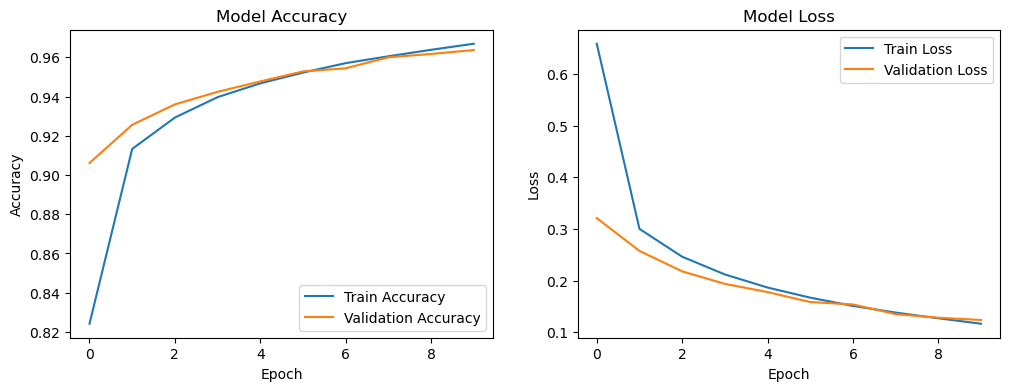

In [2]:
# a. Import the necessary packages
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# b. Load the training and testing data (using MNIST)
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Flatten the images for feed-forward network input
train_images = train_images.reshape((-1, 28 * 28))
test_images = test_images.reshape((-1, 28 * 28))

# c. Define the network architecture using Keras
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# d. Compile the model using SGD
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# e. Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# f. Evaluate the network
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

# Plot the training loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


313/313 [==============================] - 1s 2ms/step


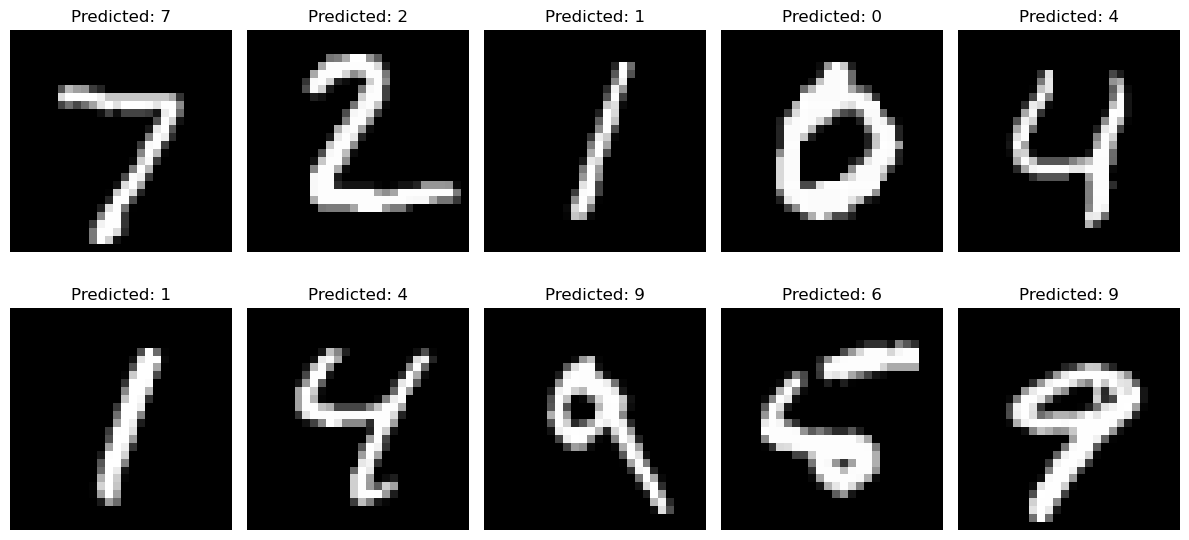

In [3]:
# g. Make predictions on the test images
predictions = model.predict(test_images)

# h. Display the first 10 images along with predicted labels
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predictions[i].argmax()}")
    plt.axis('off')
plt.tight_layout()
plt.show()
